In [ ]:
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from numpy import where

import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy as sci
from scipy.stats import sem
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

from sklearn import preprocessing
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import chisquare
from sklearn import svm

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.8.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setting global plotting parameters

In [ ]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)
parameters = {'axes.labelsize': 20, 'axes.titlesize': 30}
plt.rcParams.update(parameters)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

# Dataset 1 - Stellar Classification Dataset

The Stellar Classification Dataset used here contains 100,000 rows of data pertaining to Galaxies, Stars, and Quasars, all taken from the Sloan Dgital Sky Survey's 2017 data release (https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17). Information about each astronomical object includes the 17 featuress, such as the redshift (which can be thought of as the distance away from the Earth )at which each objet was identified, the right ascension and declination angle at which they were identified, the filters (infrared,near infrared, green and red) the survery used to capture each object, and an accompanying class that identifies each object as a Galaxy, Star, or Quasar.

The aim of this peice of experimentation is to create algorithms that can, upon analysing the 17 features pertaining to each astronomical object, classify each of them into a Galaxy, Star, or Quasar. Such a problem shifts away from the traditional binary classification problem, and adds an extra layer of complexity.

#Preprocessing the Stellar Classification dataset
The first step I took to preprocess this dataset is to convert each objects class name (which is originally a string) to a numerical value. The code looks at each class name and assigns it number, i.e.: Galaxy = 0, Star = 1, and QSO (Quasar) = 2


In [ ]:
stellar = pd.read_csv("/content/drive/MyDrive/star_classification.csv")
print(stellar)

def f(stellar):
    if stellar['class'] == 'GALAXY':
        val = 0
    elif stellar['class'] == 'STAR':
        val = 1
    else:
        val = 2

    return val

stellar['class'] = stellar.apply(f, axis=1)
stellar

stellar["class"].value_counts()

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

0    59445
1    21594
2    18961
Name: class, dtype: int64

## ANALYSIS AND PREPROCESSING

Checking the presence of null values

In [ ]:
stellar.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

No Null values present in the dataset

In [ ]:
stellar = stellar.astype(float)

X = stellar.drop(['class'], axis = 1)
y = stellar.loc[:,'class'].values

#### Understanding the distribution of the data

The distribution of the data will give us an insigth into whether or not further preprocessing is required.

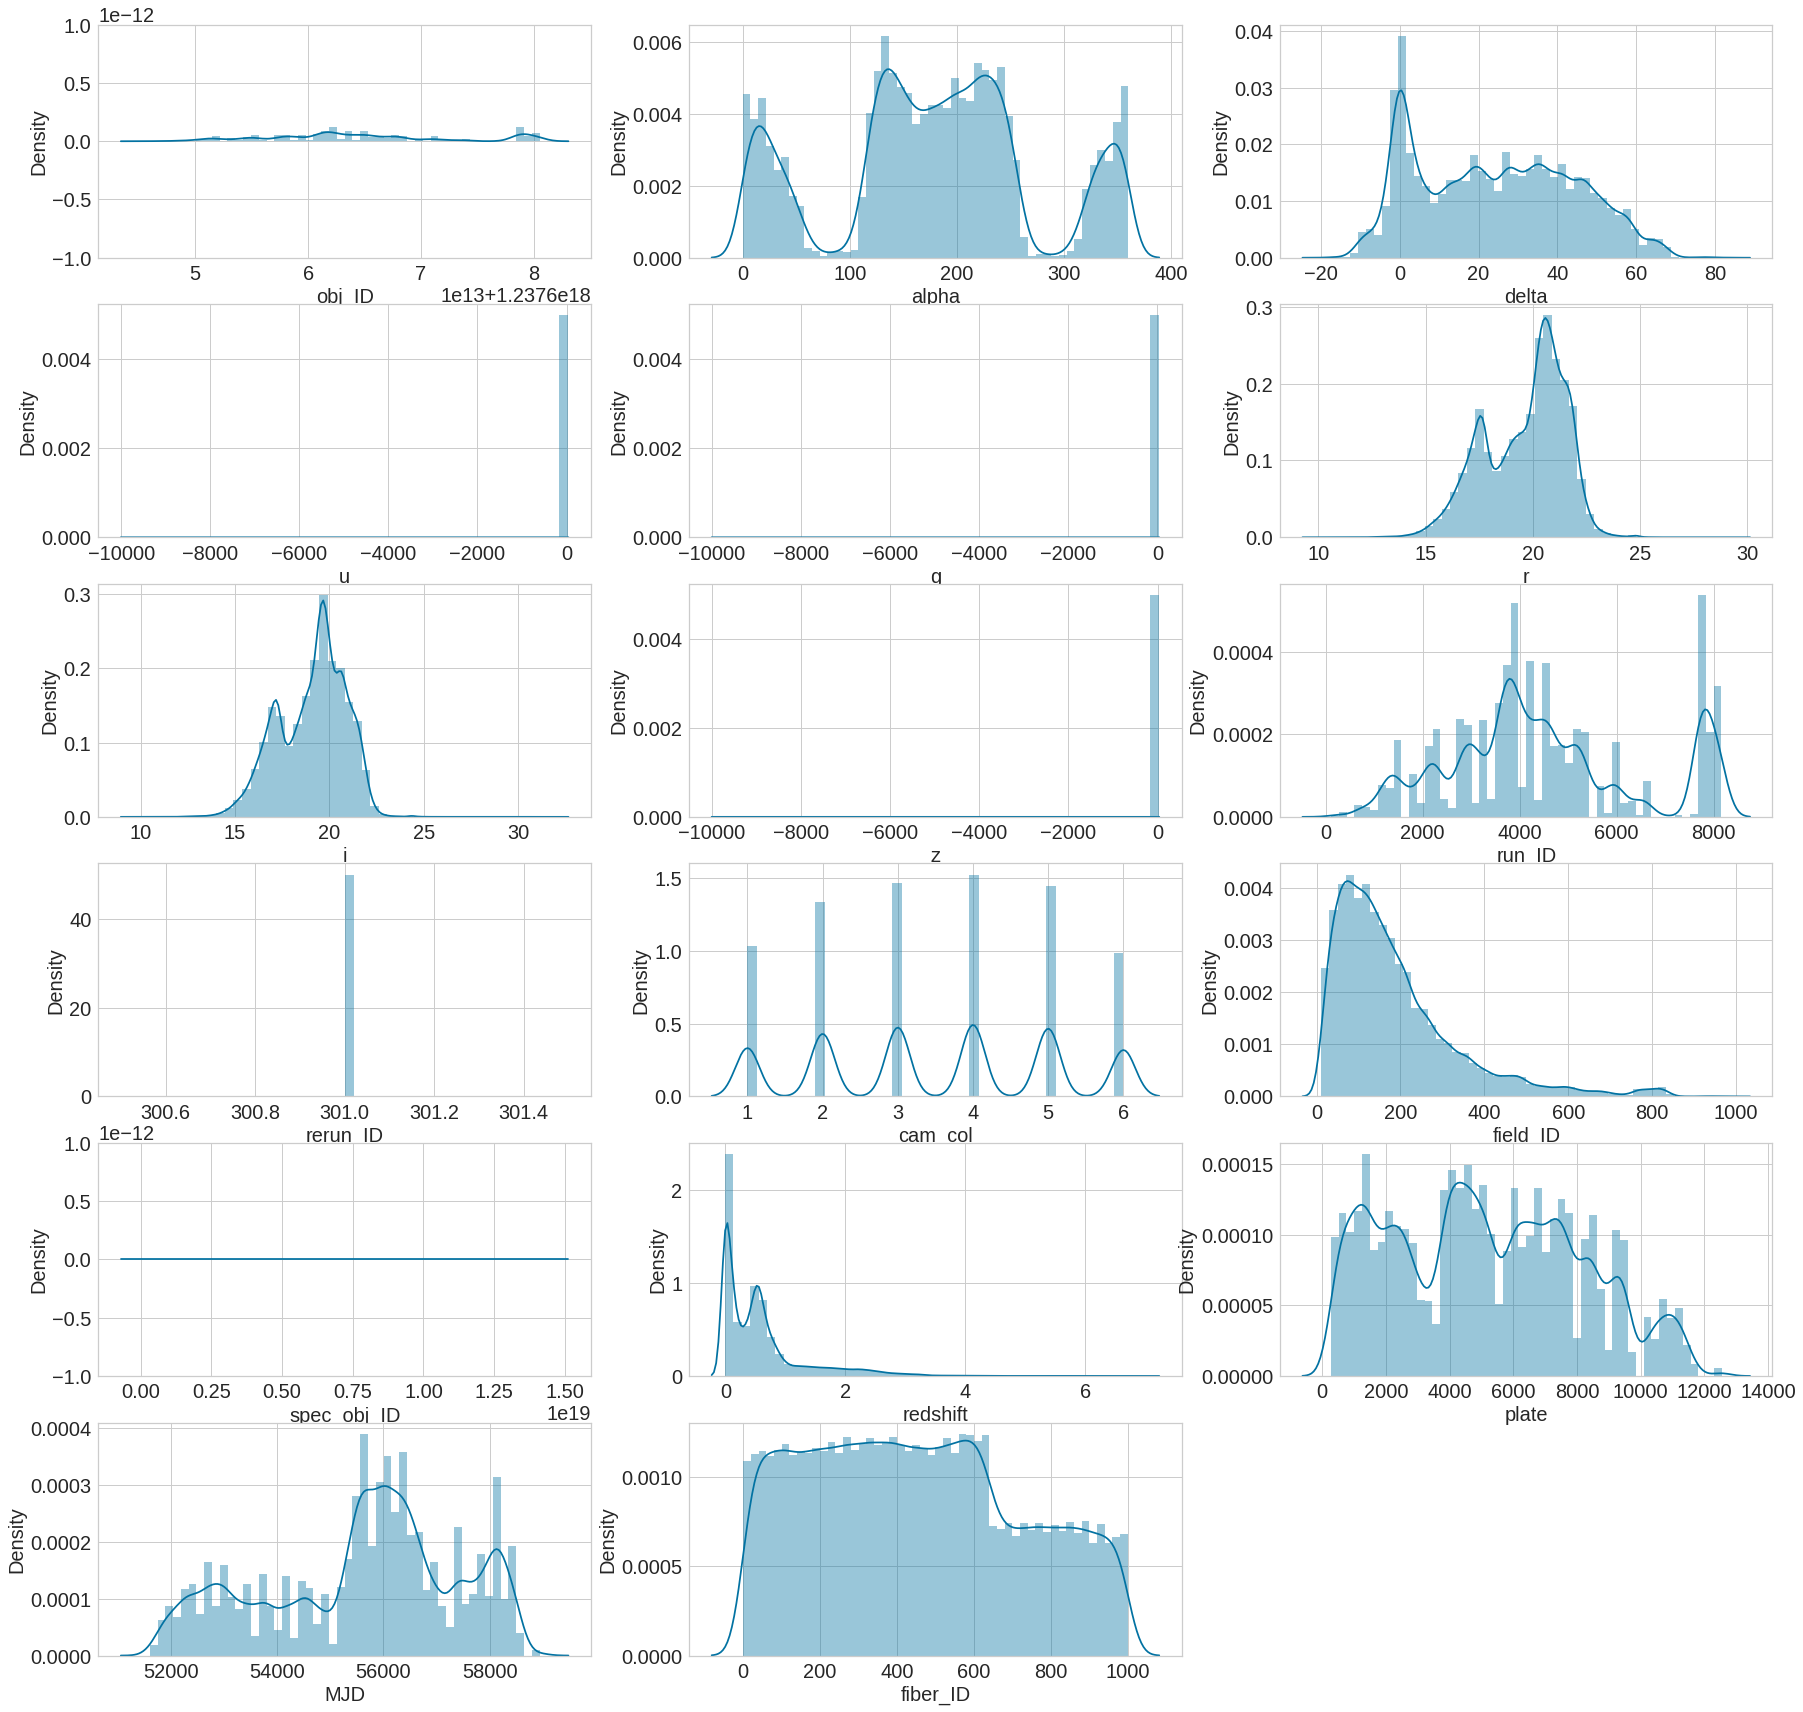

In [ ]:
#Checking the distribution of Data
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in X.columns:
    if plotnumber<=18 :
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Checking the presence of outliers

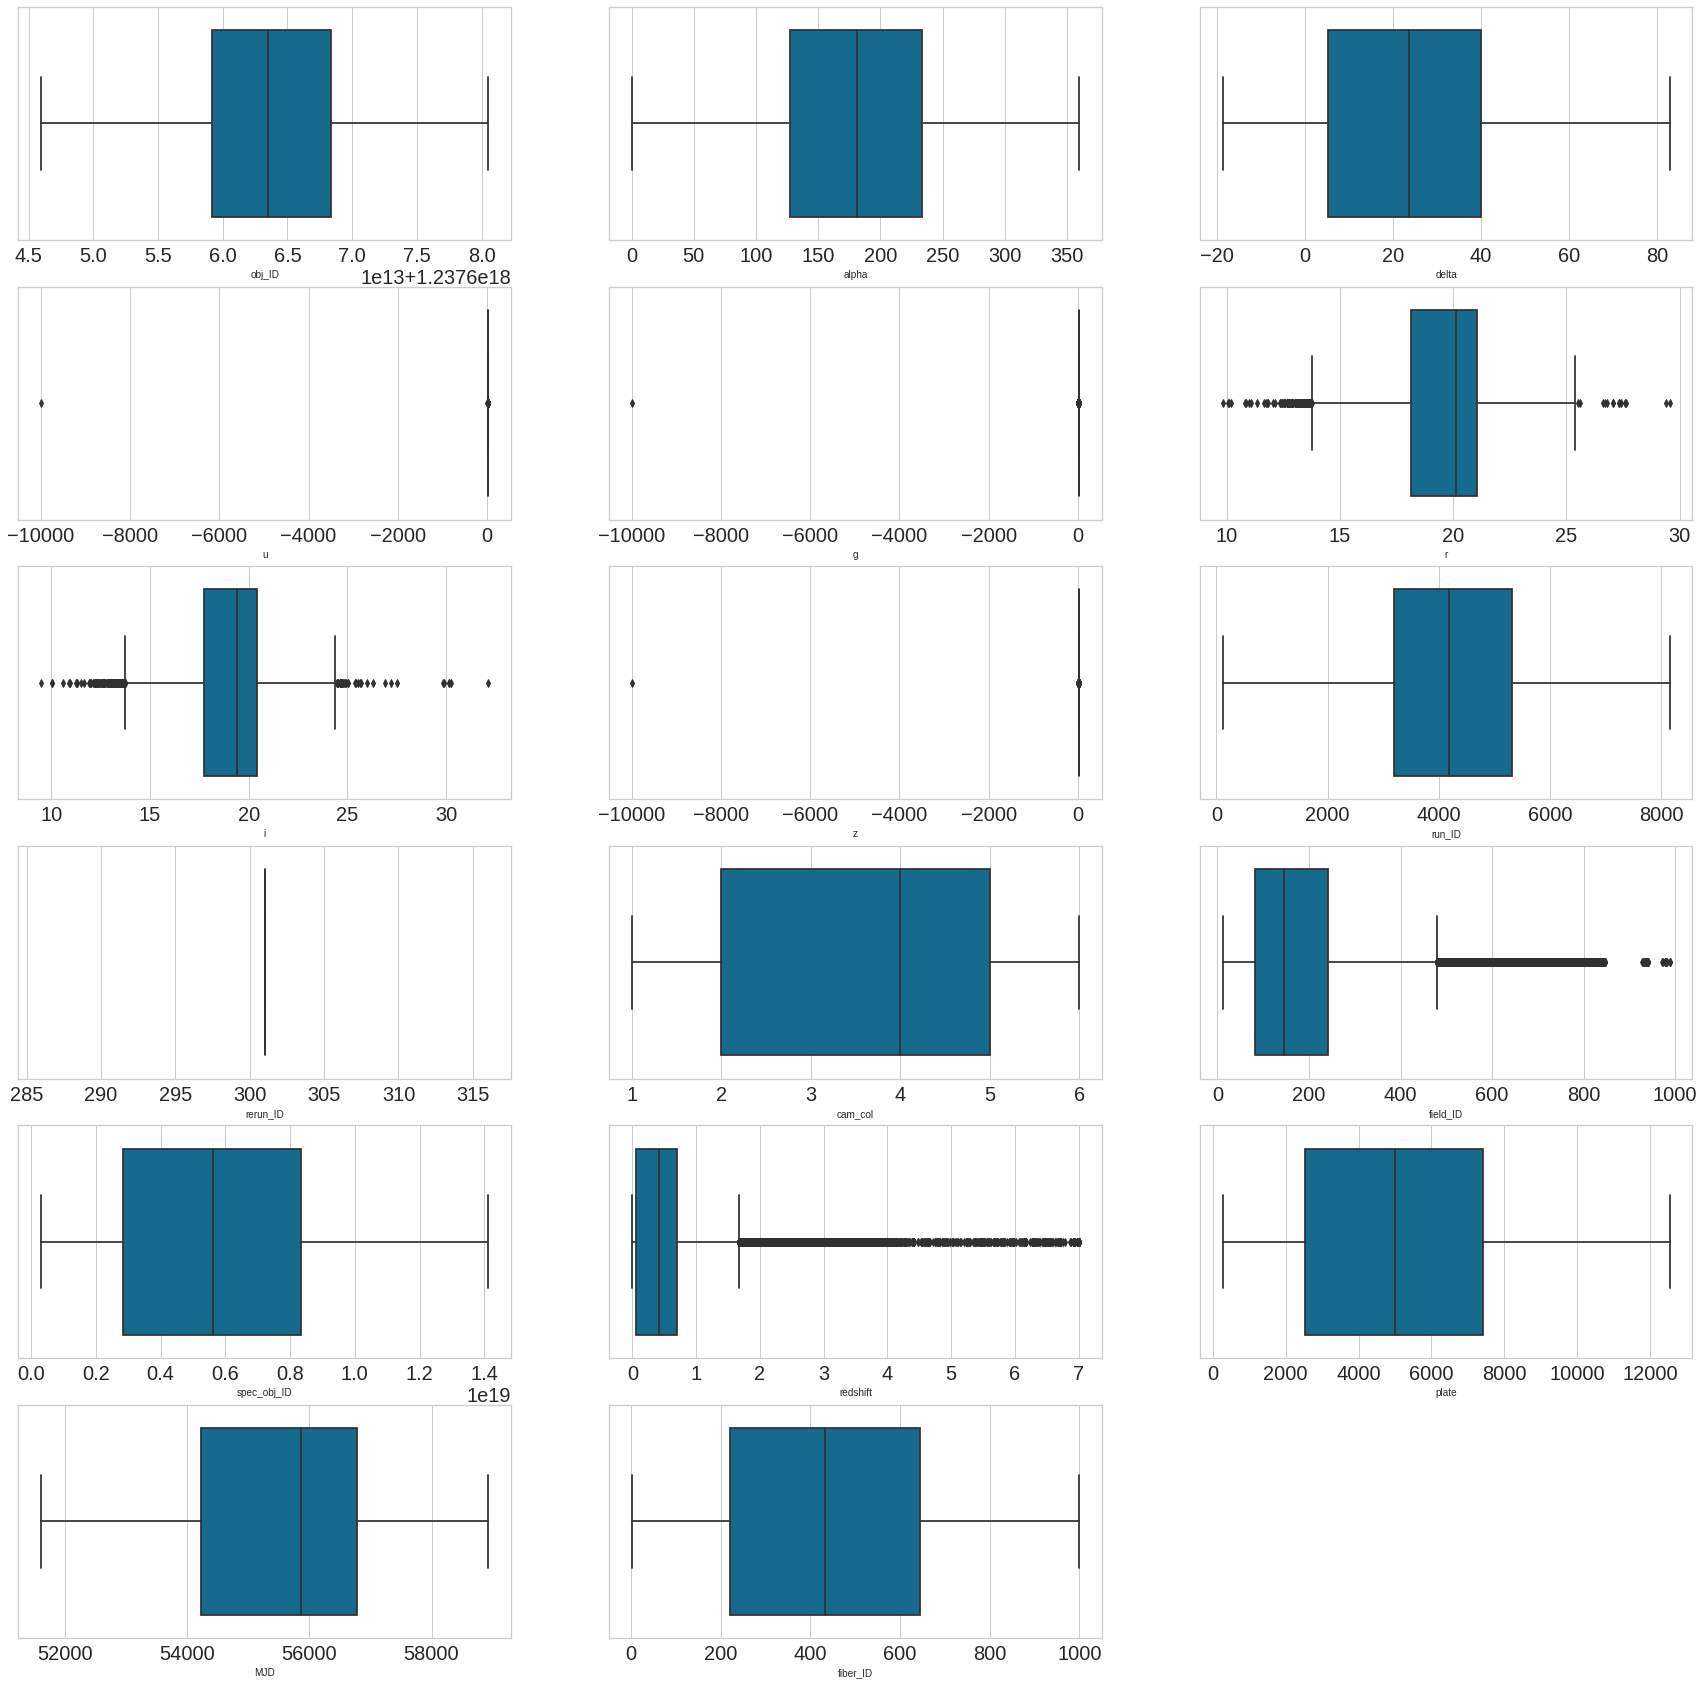

In [ ]:
plt.figure(figsize=(30,30),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(6,3,plotnumber)
    sns.boxplot((X[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

#### Checking the collinearity

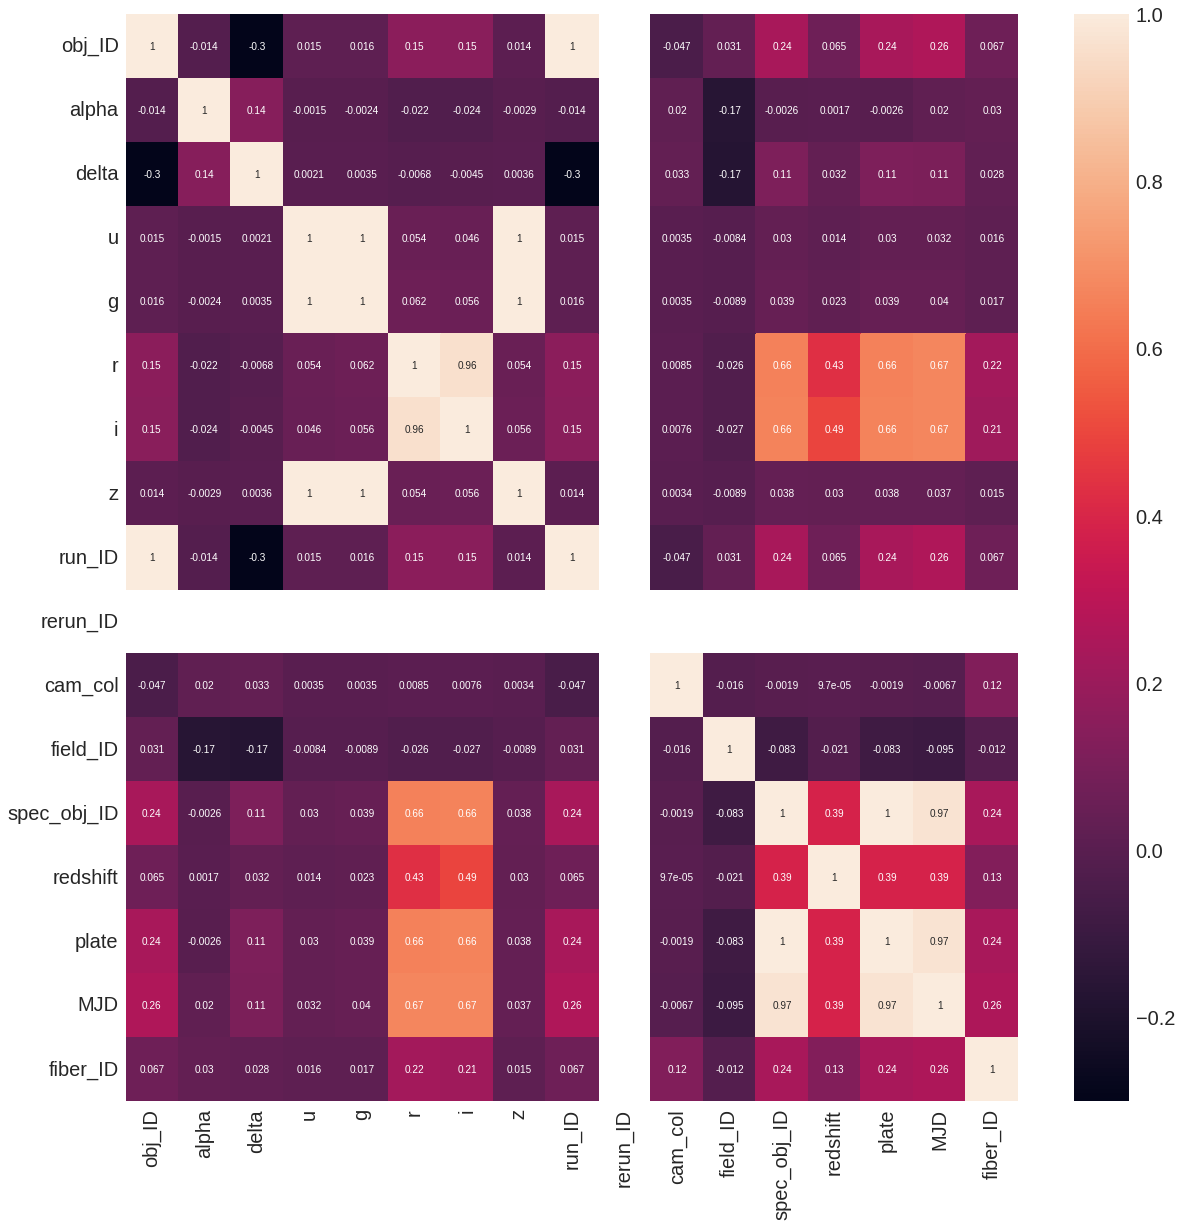

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)

#### Feature Importances

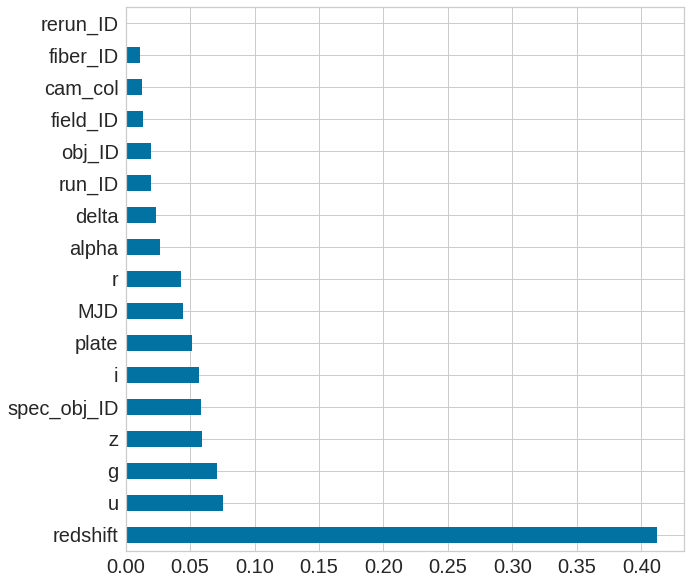

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
print(len(X['rerun_ID'].unique()))
print(len(X['spec_obj_ID'].unique()))

1
100000


Feature 'rerun_ID' has just one unique value and 'spec_obj_ID' has distinct values for each record, both of which will not contribute to explain the variance in the target variable, hence these two columns are dropped.
There is also a high correlation between column 'z' and 'u' and 'g', and 'r' with column 'i' , hence columns 'z' and 'r' are dropped

In [ ]:
X.drop(['rerun_ID','spec_obj_ID','z','r'],axis=1,inplace=True)
X

,obj_ID,alpha,delta,u,g,i,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,19.16573,3606.0,2.0,79.0,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,21.16812,4518.0,5.0,119.0,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,19.34857,3606.0,2.0,120.0,0.644195,4576.0,55592.0,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,20.50454,4192.0,3.0,214.0,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,15.97711,8102.0,3.0,137.0,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.30548,7778.0,2.0,581.0,0.000000,9374.0,57749.0,438.0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,19.75759,7917.0,1.0,289.0,0.404895,7626.0,56934.0,866.0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,17.69034,5314.0,4.0,308.0,0.143366,2764.0,54535.0,74.0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.07254,3650.0,4.0,131.0,0.455040,6751.0,56368.0,470.0


In [ ]:
y.shape

(100000,)

#### Data before sampling

Our preprocessing showed us our data is very skewed, with the Galaxy class containing most of the values. I will need to correct this, as a biased training dataset might skew the redictions of the models I used further down.

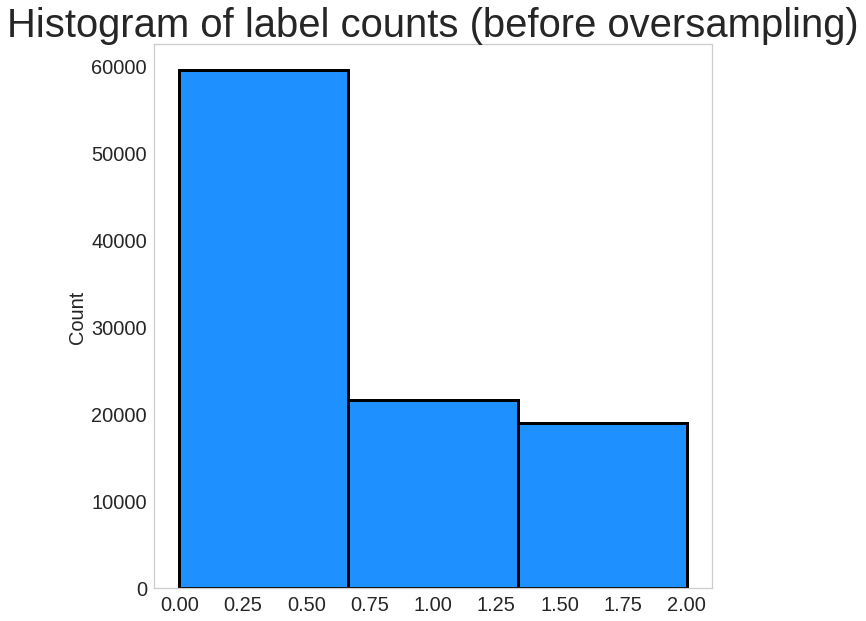

In [ ]:
plt.hist(y, bins = 3, color='dodgerblue', edgecolor='black', linewidth=3 )
plt.grid(False)
plt.title("Histogram of label counts (before oversampling)",fontsize = 40)
plt.ylabel("Count")
plt.show()

## Oversampling data to reduce data bias

Here, I apply the SMOTE() library to oversample our data so that all classes contain the same amount of values.The new histogram that shows the oversampled count of classes is shown below.

Counter({0.0: 59445, 2.0: 59445, 1.0: 59445})


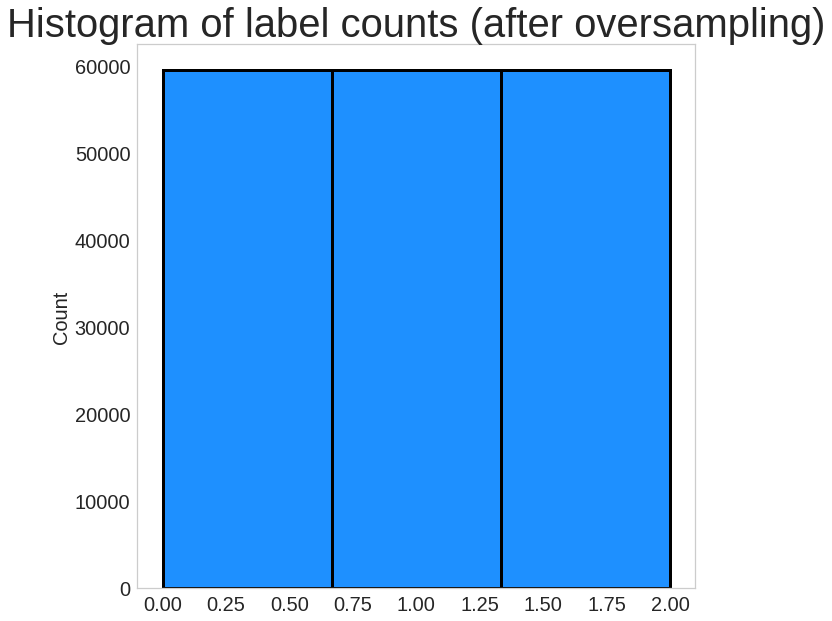

In [ ]:
stellar = stellar.astype(float)

X = stellar.drop(['class'], axis = 1)
y = stellar.loc[:,'class'].values

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

standard = preprocessing.scale(X)

plt.hist(y, bins = 3, color='dodgerblue', edgecolor='black', linewidth=3 )
plt.grid(False)
plt.title("Histogram of label counts (after oversampling)",fontsize = 40)
plt.ylabel("Count")
plt.show()

In [ ]:
X.shape

(178335, 17)

In [ ]:
y.shape

(178335,)

# split training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #splitting dataset
                                                                                          #75/25

In [ ]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN Algorithm
- evaluation metrics looked at - accuracy/precision/f1 scores, confusion matrix

KNN Model Accuracy: 0.928
KNN Model Precision: 0.928
KNN Model Recall: 0.928
KNN Model F1: 0.928


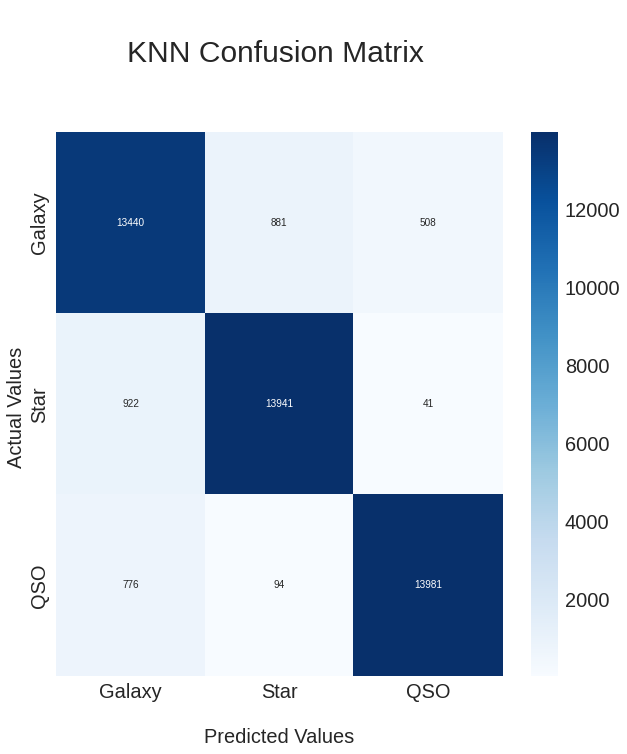

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors= 3)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)


print("KNN Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred_knn), 3))
print("KNN Model Precision:",round(metrics.precision_score(y_test, y_pred_knn, average = 'micro'), 3))
print("KNN Model Recall:",round(metrics.recall_score(y_test, y_pred_knn, average = 'micro'), 3))
print("KNN Model F1:",round(metrics.f1_score(y_test, y_pred_knn, average = 'micro'), 3))

knn_cf_matrix = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(knn_cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('\nKNN Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Galaxy','Star','QSO'])
ax.yaxis.set_ticklabels(['Galaxy','Star','QSO'])
plt.show()

## Random Forest

- evaluation metrics looked at - accuracy/precision/f1 scores, confusion matrix

RF Model Accuracy: 0.983
RF Model Precision: 0.983
RF Model Recall: 0.983
RF Model F1: 0.983


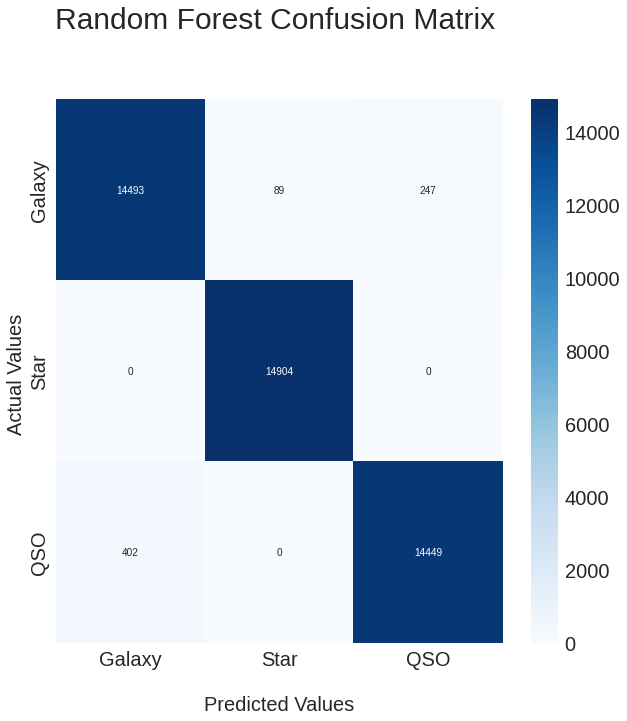

In [ ]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score = rf.score(X_test, y_test)
rfscore = np.mean(score)

print("RF Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred_rf), 3))
print("RF Model Precision:",round(metrics.precision_score(y_test, y_pred_rf, average = 'micro'), 3))
print("RF Model Recall:",round(metrics.recall_score(y_test, y_pred_rf, average = 'micro'), 3))
print("RF Model F1:",round(metrics.f1_score(y_test, y_pred_rf, average = 'micro'), 3))


rf_cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(rf_cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('Random Forest Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Galaxy','Star','QSO'])
ax.yaxis.set_ticklabels(['Galaxy','Star','QSO'])
plt.show()

## Decision Tree

- evaluation metrics looked at - accuracy/precision/f1 scores, confusion matrix

0.957473533106047


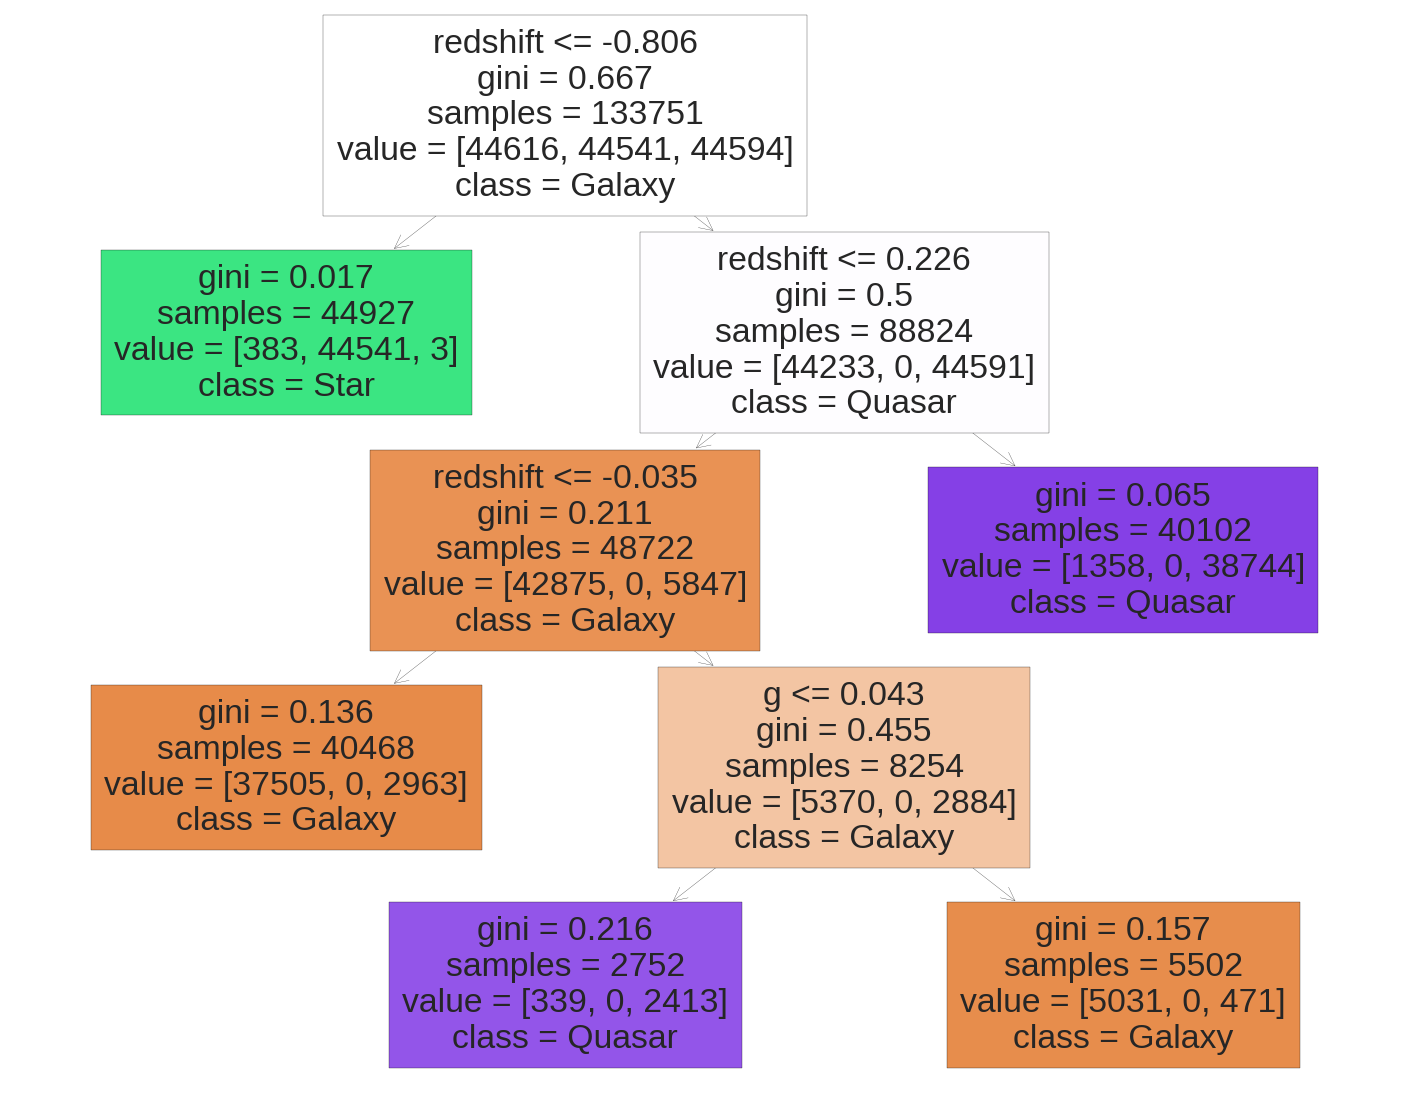

In [ ]:
features = list(X.columns)

dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005, min_samples_leaf = 2)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(str(score))

fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt,
                   feature_names= features,
                   class_names= ['Galaxy', 'Star', 'Quasar'] ,
                   filled=True)
plt.show()

DT Model Accuracy: 0.957
DT Model Precision: 0.957
DT Model Recall: 0.957
DT Model F1: 0.957


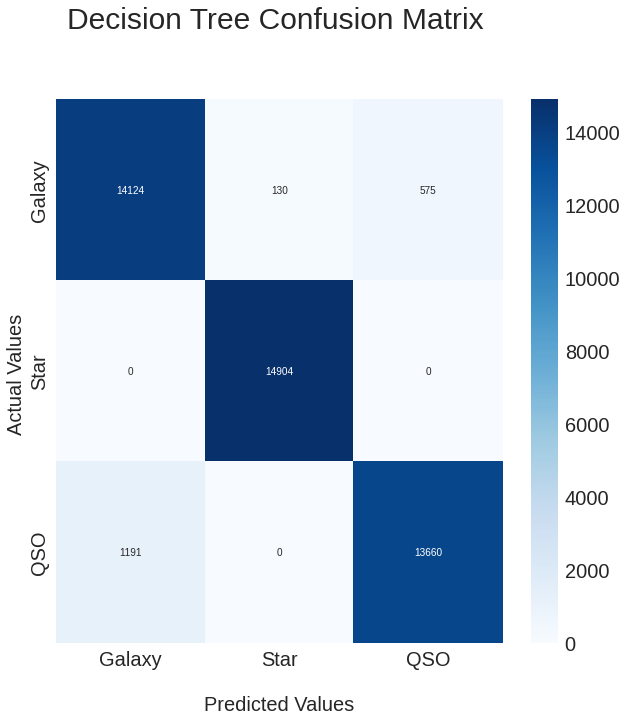

In [ ]:
y_pred_dt = dt.predict(X_test)

print("DT Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred_dt), 3))
print("DT Model Precision:",round(metrics.precision_score(y_test, y_pred_dt, average = 'micro'), 3))
print("DT Model Recall:",round(metrics.recall_score(y_test, y_pred_dt, average = 'micro'), 3))
print("DT Model F1:",round(metrics.f1_score(y_test, y_pred_dt, average = 'micro'), 3))


dt_cf_matrix = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(dt_cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('Decision Tree Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Galaxy','Star','QSO'])
ax.yaxis.set_ticklabels(['Galaxy','Star','QSO'])
plt.show()

## Multi Layer Perceptron

- evaluation metrics looked at - accuracy/precision/f1 scores, confusion matrix

MLP Model Accuracy: 0.973
MLP Model Precision: 0.973
MLP Model Recall: 0.973
MLP Model F1: 0.973


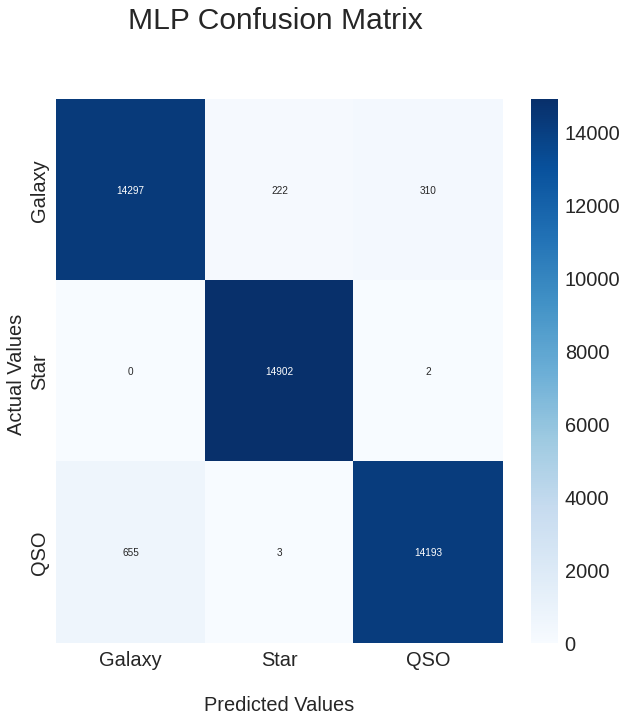

In [ ]:
mlp = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)

print("MLP Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred_mlp), 3))
print("MLP Model Precision:",round(metrics.precision_score(y_test, y_pred_mlp, average = 'micro'), 3))
print("MLP Model Recall:",round(metrics.recall_score(y_test, y_pred_mlp, average = 'micro'), 3))
print("MLP Model F1:",round(metrics.f1_score(y_test, y_pred_mlp, average = 'micro'), 3))

mlp_cf_matrix = confusion_matrix(y_test, y_pred_mlp)
ax = sns.heatmap(mlp_cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('MLP Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Galaxy','Star','QSO'])
ax.yaxis.set_ticklabels(['Galaxy','Star','QSO'])
plt.show()

## Logistic Regression

- evaluation metrics looked at - accuracy/precision/f1 scores, confusion matrix

Logistic Regression Model Accuracy: 0.96
Logistic Regression Model Precision: 0.96
Logistic Regression Model Recall: 0.96
Logistic Regression Model F1: 0.96


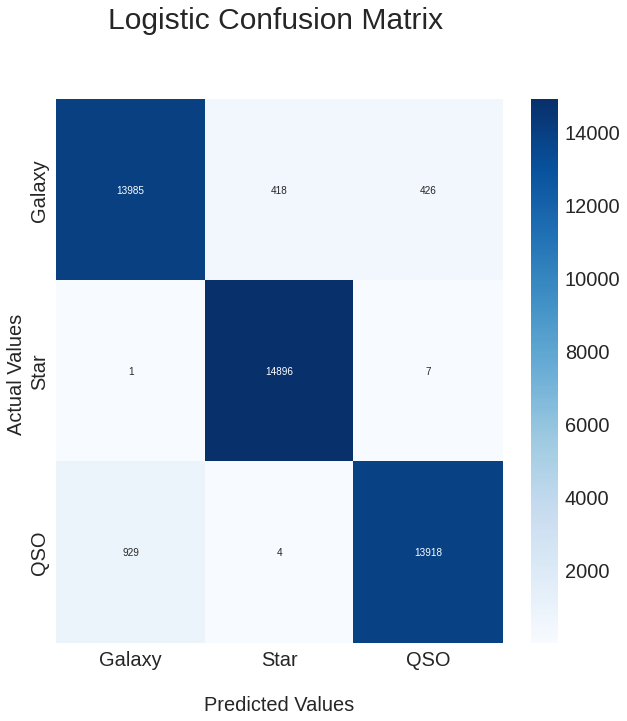

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 30000)# defining the maximum number of
                                                              #iterations for the solver to converge

logreg.fit(X_train,y_train) #taking in as training inputs 75% of the traininf dataset and its labels
y_pred_lr = logreg.predict(X_test)

print("Logistic Regression Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred_lr), 3))
print("Logistic Regression Model Precision:",round(metrics.precision_score(y_test, y_pred_lr, average = 'micro'), 3))
print("Logistic Regression Model Recall:",round(metrics.recall_score(y_test, y_pred_lr, average = 'micro'), 3))
print("Logistic Regression Model F1:",round(metrics.f1_score(y_test, y_pred_lr, average = 'micro'), 3))

lr_cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(lr_cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('Logistic Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Galaxy','Star','QSO'])
ax.yaxis.set_ticklabels(['Galaxy','Star','QSO'])
plt.show()

# Model Evaluation and Comparision Using Cross Validation

Cross validation with the accuracy score

STELLAR Dataset
RF: 0.982856 (0.000980)
Decision Tree: 0.972389 (0.001941)
N Neighbours: 0.926326 (0.001857)
MLP: 0.972980 (0.001305)
Log Reg: 0.959492 (0.001394)


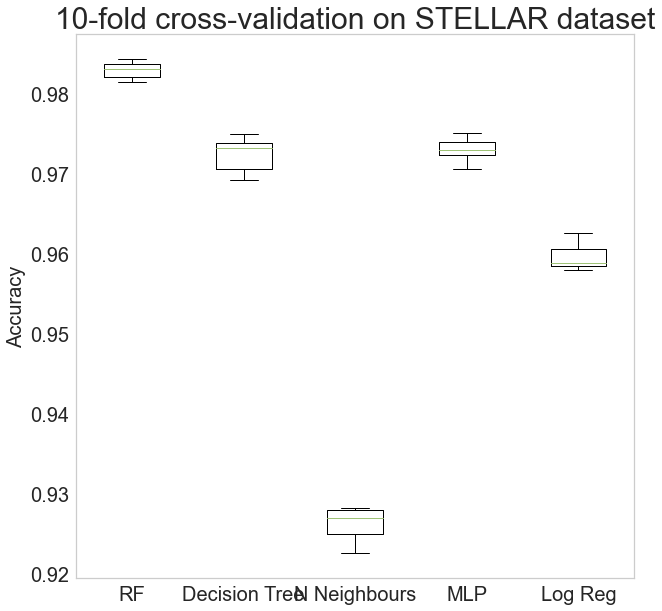

In [ ]:
models = []

models.append(('RF', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 3)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=1000)))
models.append(('Log Reg', LogisticRegression(solver='lbfgs', max_iter  = 1000)))

# evaluate each model in turn
print ('STELLAR Dataset')
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits= 10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.ylabel("Accuracy")
pyplot.title('10-fold cross-validation on STELLAR dataset (AUC)')
pyplot.grid(False)
pyplot.show()

Cross validation with roc_auc metric

STELLAR Dataset
RF: 0.998298 (0.000181)
Decision Tree: 0.978669 (0.001052)
KNN: 0.975455 (0.000718)
MLP: 0.995810 (0.000474)
Log Reg: 0.992084 (0.000778)


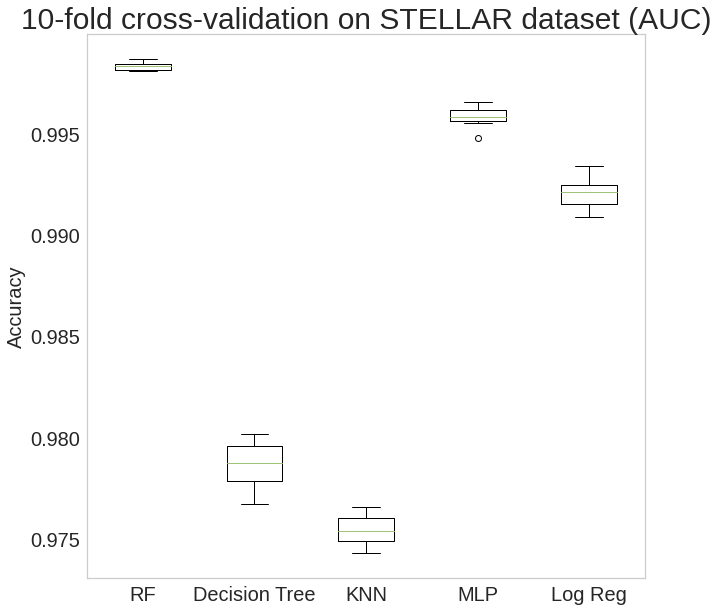

In [ ]:
models = []

models.append(('RF', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 3)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=1000)))
models.append(('Log Reg', LogisticRegression(solver='lbfgs', max_iter  = 1000)))

# evaluate each model in turn
print ('STELLAR Dataset')
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits= 10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc_ovr')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.ylabel("Accuracy")
pyplot.title('10-fold cross-validation on STELLAR dataset (AUC)')
pyplot.grid(False)
pyplot.show()